In [8]:
# 목적: clustering 관련 모듈 기본
import matplotlib, matplotlib.pyplot as plt
import pandas as pd
import sklearn.cluster, sklearn.preprocessing
import warnings
warnings.filterwarnings('ignore')

In [9]:
alco2009 = pd.read_csv("niaaa-report2009.csv",index_col="State")
alco2009.head()
# Postal : 지역코드
# Beer : 맥주소비량
# Wine : 와인소비량

,Postal,Beer,Wine
State,,,
Alabama,AL,1.20,0.22
Alaska,AK,1.31,0.54
Arizona,AZ,1.19,0.38
Arkansas,AR,1.07,0.17
California,CA,1.05,0.55


In [15]:
alco2009.shape

(51, 4)

In [44]:
columns = ["Wine", "Beer"]
# 클러스터링 객체를 생성하고 모델을 학습시킨다.
kmeans = sklearn.cluster.KMeans(n_clusters=9, random_state = 77)
# n_clusters 인자 수만큼 임의로 데이터를 군집화
kmeans.fit(alco2009[columns])
alco2009["Clusters"] = kmeans.labels_
alco2009.head()

,Postal,Beer,Wine,Clusters
State,,,,
Alabama,AL,1.20,0.22,3
Alaska,AK,1.31,0.54,2
Arizona,AZ,1.19,0.38,7
Arkansas,AR,1.07,0.17,3
California,CA,1.05,0.55,0


Text(0.5, 1.0, 'US States Clustered by Alcohol Consumption')

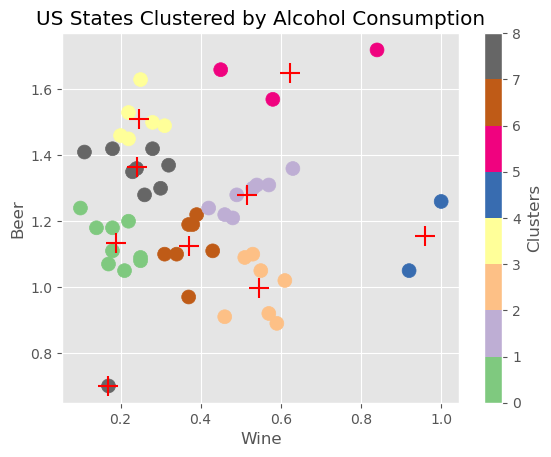

In [32]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# 플로팅 스타일을 선택한다.
matplotlib.style.use("ggplot")

# 주와 centroid를 플롯에 그린다.
ax = alco2009.plot.scatter(columns[0], columns[1], c="Clusters", 
                           cmap=plt.cm.Accent, s=100)
centers.plot.scatter(columns[0], columns[1], color="red", marker="+", 
                     s=200, ax=ax)

# 플롯에 제목을 붙이고 저장한다.
plt.title("US States Clustered by Alcohol Consumption")
# plt.savefig("clusters.pdf")

In [33]:
centers

,Wine,Beer
0,0.188889,1.133333
1,0.515000,1.278750
2,0.545714,0.997143
3,0.246667,1.510000
4,0.960000,1.155000
5,0.623333,1.650000
6,0.370000,1.125714
7,0.240000,1.363750
8,0.170000,0.700000


In [45]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

max_score = 0
optimized_n = 0
for k in range(2,20):
   
    km = KMeans(n_clusters=k, random_state = 77).fit(alco2009[columns])
    # silhouette_score N개로 클러스터링했을 때 중심점을 기준으로 모여있는 정도를 나타내는 수치
    s_score = silhouette_score(alco2009[columns],km.labels_)
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 2 clusters:0.348
score for 3 clusters:0.372
score for 4 clusters:0.376
score for 5 clusters:0.413
score for 6 clusters:0.453
score for 7 clusters:0.385
score for 8 clusters:0.444
score for 9 clusters:0.425
score for 10 clusters:0.395
score for 11 clusters:0.374
score for 12 clusters:0.385
score for 13 clusters:0.381
score for 14 clusters:0.424
score for 15 clusters:0.398
score for 16 clusters:0.377
score for 17 clusters:0.396
score for 18 clusters:0.367
score for 19 clusters:0.368

 최적의 클러스터개수: 6, silhouette 점수: 0.45345900547408574


Text(0.5, 1.0, 'US States Clustered by Alcohol Consumption')

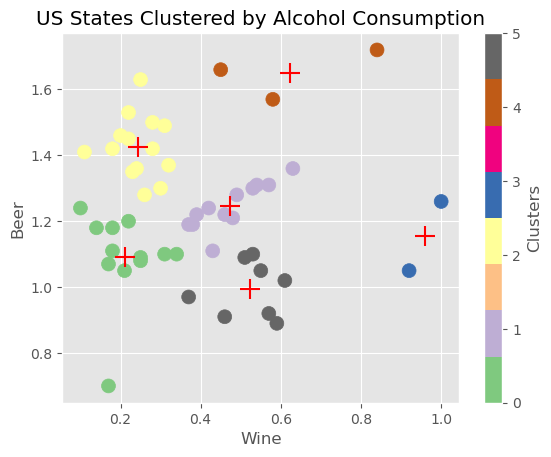

In [46]:
columns = ["Wine", "Beer"]
# 클러스터링 객체를 생성하고 모델을 학습시킨다.
kmeans = sklearn.cluster.KMeans(n_clusters=optimized_n, random_state = 77)
kmeans.fit(alco2009[columns])
alco2009["Clusters"] = kmeans.labels_
centers = pd.DataFrame(kmeans.cluster_centers_, columns=columns)

# 플로팅 스타일을 선택한다.
matplotlib.style.use("ggplot")

# 주와 centroid를 플롯에 그린다.
ax = alco2009.plot.scatter(columns[0], columns[1], c="Clusters", 
                           cmap=plt.cm.Accent, s=100)
centers.plot.scatter(columns[0], columns[1], color="red", marker="+", 
                     s=200, ax=ax)

# 플롯에 제목을 붙이고 저장한다.
plt.title("US States Clustered by Alcohol Consumption")

# Label이 없는 데이터에 대한 해석

In [48]:
wine = pd.read_csv('winequality-both.csv',sep=',',header=0)
wine.columns = wine.columns.str.replace(' ','_')
colums_list = ['alcohol','chlorides','citric_acid','density','fixed_acidity','free_sulfur_dioxide','pH',
               'residual_sugar','sulphates','total_sulfur_dioxide','volatile_acidity']
feature = wine[colums_list]
feature.head()

,alcohol,chlorides,citric_acid,density,fixed_acidity,free_sulfur_dioxide,pH,residual_sugar,sulphates,total_sulfur_dioxide,volatile_acidity
0,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70
1,9.8,0.098,0.00,0.9968,7.8,25.0,3.20,2.6,0.68,67.0,0.88
2,9.8,0.092,0.04,0.9970,7.8,15.0,3.26,2.3,0.65,54.0,0.76
3,9.8,0.075,0.56,0.9980,11.2,17.0,3.16,1.9,0.58,60.0,0.28
4,9.4,0.076,0.00,0.9978,7.4,11.0,3.51,1.9,0.56,34.0,0.70


In [49]:
max_score = 0
optimized_n = 0
for k in range(2,10):
   
    km = KMeans(n_clusters=k).fit(feature)
   
    s_score = silhouette_score(feature,km.labels_)
    if s_score > max_score:
        max_score = s_score
        optimized_n = k
    print("score for %d clusters:%.3f" % (k, s_score))
    
print(f'\n 최적의 클러스터개수: {optimized_n}, silhouette 점수: {max_score}')

score for 2 clusters:0.509
score for 3 clusters:0.504
score for 4 clusters:0.451
score for 5 clusters:0.418
score for 6 clusters:0.391
score for 7 clusters:0.365
score for 8 clusters:0.365
score for 9 clusters:0.344

 최적의 클러스터개수: 2, silhouette 점수: 0.5094282376210143


In [52]:
km = KMeans(n_clusters=2).fit(feature)

In [54]:
import numpy as np
wine['type'] = np.where(wine['type'] == 'red', 0, 1)

In [55]:
km.labels_ 

array([0, 0, 0, ..., 1, 0, 0])

In [56]:
(list(km.labels_ == wine['type'].values).count(True)) / len(km.labels_)

0.7855933507772819

In [103]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(feature)
feature_s = ss.transform(feature)

In [104]:
km = KMeans(n_clusters=2).fit(feature_s)

In [105]:
(list(km.labels_ == wine['type'].values).count(True)) / len(km.labels_)

0.7471140526396799

# 정리

군집화 결과는 아래와 같이 사용 가능하다.
 - 군집화 클러스터별 마케팅 전략 수립
 - 군집화된 클러스터 라벨을 지도학습의 라벨로 활용
  > 라벨없이 지도학습 가능